<a href="https://colab.research.google.com/github/TerryTian21/PyTorch-Practice/blob/main/video_4_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Mon Nov 13 03:45:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |   1161MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


2.1.0+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# 1. Automobile Industry
# 2. Photoshop and image editing
# 3. Facial recognition (i.e. Apple face ID)

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Overfitting is when a model learns the patterns of the train data too well and doesn't generalize to new/unseen data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Early topping - pauses the training phase when validation loss hits a critical point
# Pruning - Identifies the most important features within the training set and eliminates irrelevant ones
# Regularization - Eliminate factors that do not impact prediction outcomes by grading features based on importance ( adding a penalty for model complexity)
# Ensemebling - Combining predictiosn from several separate ML algorithms (using weaker learners to get a more accurate result)
# Data Augmentation - Changes sample data slightly to incrase the number of samples

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# Done.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms


In [ ]:
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())


In [ ]:
print(len(train_data))
print(train_data[0])

60000
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
img = train_data[0][0]
print(img.shape) # Colour channels, height, width

torch.Size([1, 28, 28])


In [ ]:
type(train_data)

torchvision.datasets.mnist.MNIST

## 6. Visualize at least 5 different samples of the MNIST training dataset.

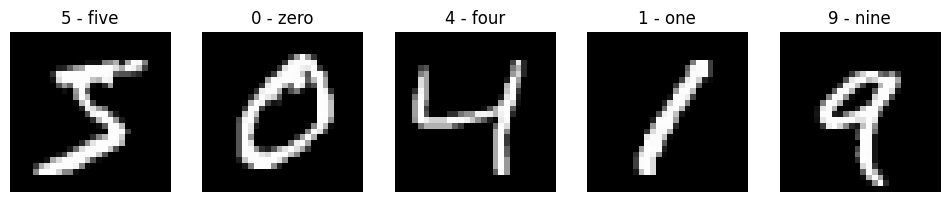

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for index in range(5):
  plt.subplot(1, 5, index + 1)
  img_arr = train_data[index][0].permute(1,2,0)
  plt.imshow(img_arr, cmap="gray")
  plt.axis(False)
  plt.title(class_names[train_data[index][1]])


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader
import os

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers = os.cpu_count())

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False,
                             num_workers=os.cpu_count())

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
# Recreating the Tiny VGG Model
from torch import nn

class ClassificationModel(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     padding=0)
    )
    self.layer_stack2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     padding=0)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10 * 16,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.layer_stack1(x)
    x = self.layer_stack2(x)
    return self.classifier(x)



In [ ]:
torch.manual_seed(42)
HIDDEN_UNITS = 10

model_0 = ClassificationModel(input_shape=1,
                              hidden_units = HIDDEN_UNITS,
                              output_shape = len(class_names))

inputs, classes = next(iter(train_dataloader))
input = inputs[0]
print(input)
print(input.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
model_0.state_dict

<bound method Module.state_dict of ClassificationModel(
  (layer_stack1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_stack2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)>

In [ ]:
# Test the sample input to find the flatten shape
output = model_0(input.unsqueeze(dim=0))
output

tensor([[-0.0796,  0.0602,  0.0140, -0.0501, -0.0925,  0.0082,  0.0143, -0.0696,
          0.0689,  0.0659]], grad_fn=<AddmmBackward0>)

In [ ]:
output = output.softmax(dim=1).argmax(dim=1)


In [ ]:
output

tensor([8])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
def train_step(model: torch.nn.Module,
          dataloader,
          loss_fn,
          optimizer,
          accuracy_fn,
          device):

  model.train()
  #Aggregate the loss and accuracy
  total_loss, acc = 0, 0

  for (X,y) in dataloader:
    X, y = X.to(device), y.to(device)
    y_logits = model(X)

    loss = loss_fn(y_logits, y)
    total_loss += loss
    y_preds = y_logits.softmax(dim=1).argmax(dim=1)
    acc += accuracy_fn(y_preds, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  total_loss /= len(dataloader)
  acc /= len(dataloader)

  return (loss, acc)

def test_step(model,
         dataloader,
         loss_fn,
         accuracy_fn,
         device):

  model.eval()
  loss, acc = 0, 0

  with torch.inference_mode():
    for (X,y) in dataloader:
      X, y = X.to(device), y.to(device)
      y_logits = model(X)
      y_preds = y_logits.softmax(dim=1).argmax(dim=1)

      loss += loss_fn(y_logits, y)
      acc += accuracy_fn(y_preds, y)

    loss /= len(dataloader)
    acc /= len(dataloader)

  return loss, acc



In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [ ]:
def train(model,
          epochs,
          train_dataloader,
          test_dataloader,
          loss_fn,
          accuracy_fn,
          optimizer,
          device):

  output_dict = {"train_loss" : [],
                "train_acc" : [],
                "test_loss" : [],
                "test_acc" : []}

  print("Starting Training ----------------")

  for epoch in tqdm(range(epochs)):

    # Training

    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    output_dict["train_loss"].append(train_loss)
    output_dict["train_acc"].append(train_acc)

    # Testing
    test_loss, test_acc = test_step(model, test_dataloader, loss_fn, accuracy_fn, device)
    output_dict["test_loss"].append(test_loss)
    output_dict["test_acc"].append(test_acc)

    print(f"Epcoh : {epoch} | Train Loss : {train_loss:.3f} | Train Acc : {train_acc:.2f} | Test Loss : {test_loss:.3f} | Test Acc : {test_acc:.2f}")

  return output_dict

In [ ]:
!pip install torchmetrics

In [ ]:
len(class_names)

10

In [ ]:
# Set up some hyperparameters
from torchmetrics.classification import MulticlassAccuracy


EPOCHS = 5
LR = 0.01
accuracy_fn = MulticlassAccuracy(num_classes=len(class_names))


In [ ]:
# Train on CPU
device = "cpu"
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = ClassificationModel(1, 10, len(class_names))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = LR)

training_start_time = timer()

results = train(model_1, EPOCHS, train_dataloader, test_dataloader, loss_fn, accuracy_fn, optimizer, device)

training_end_time = timer()

print(f"Total time taken : {(training_start_time - training_end_time):.3f}")

Starting Training ----------------


  0%|          | 0/5 [00:00<?, ?it/s]

Epcoh : 0 | Train Loss : 0.211 | Train Acc : 0.44 | Test Loss : 0.215 | Test Acc : 0.93
Epcoh : 1 | Train Loss : 0.042 | Train Acc : 0.94 | Test Loss : 0.102 | Test Acc : 0.97
Epcoh : 2 | Train Loss : 0.311 | Train Acc : 0.96 | Test Loss : 0.101 | Test Acc : 0.96
Epcoh : 3 | Train Loss : 0.009 | Train Acc : 0.97 | Test Loss : 0.069 | Test Acc : 0.98
Epcoh : 4 | Train Loss : 0.050 | Train Acc : 0.97 | Test Loss : 0.061 | Test Acc : 0.98
Total time taken : -204.169


In [ ]:
# Train on GPU
device = "cuda" if torch.cuda.is_available else print("error")

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = ClassificationModel(1, 10, len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = LR)

training_start_time = timer()

accuracy_fn.to(device)
results = train(model_2, EPOCHS, train_dataloader, test_dataloader, loss_fn, accuracy_fn, optimizer, device)

training_end_time = timer()

print(f"Total time taken : {(training_end_time - training_start_time):.3f}")

Starting Training ----------------


  0%|          | 0/5 [00:00<?, ?it/s]

Epcoh : 0 | Train Loss : 0.212 | Train Acc : 0.44 | Test Loss : 0.216 | Test Acc : 0.93
Epcoh : 1 | Train Loss : 0.042 | Train Acc : 0.94 | Test Loss : 0.101 | Test Acc : 0.97
Epcoh : 2 | Train Loss : 0.309 | Train Acc : 0.96 | Test Loss : 0.101 | Test Acc : 0.97
Epcoh : 3 | Train Loss : 0.009 | Train Acc : 0.97 | Test Loss : 0.068 | Test Acc : 0.98
Epcoh : 4 | Train Loss : 0.046 | Train Acc : 0.97 | Test Loss : 0.061 | Test Acc : 0.98
Total time taken : 150.372


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
model_2.eval()
loss_fn = nn.CrossEntropyLoss()

predictions = []

with torch.inference_mode():

  loss, acc = 0, 0

  for (X,y) in test_dataloader:
    X, y = X.to(device), y.to(device)

    y_logits = model_2(X)
    y_preds = y_logits.softmax(dim=1).argmax(dim=1)
    predictions.append(y_preds)

    loss += loss_fn(y_logits, y)
    acc += accuracy_fn(y_preds,  y)

  loss /= len(test_dataloader)
  acc /= len(test_dataloader)

  print(f"Loss: {loss} | Acc: {acc}")


Loss: 0.06073470786213875 | Acc: 0.9794385433197021


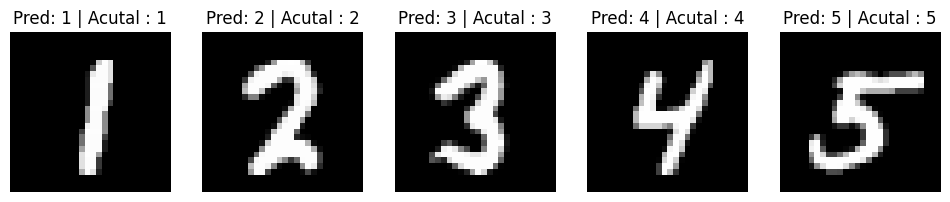

In [ ]:
  plt.figure(figsize=(12,6))

  for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X[i].cpu().permute(1,2,0), cmap="gray")
    index = y_preds[i]
    plt.title(f"Pred: {index} | Acutal : {y[i]}")
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = torch.cat(predictions).cpu()
labels = test_data.targets


In [ ]:
print(predictions[:10])
print(labels[:10])

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


In [ ]:
cf_matrix = confusion_matrix(labels, predictions)
print(cf_matrix)

[[ 975    0    0    0    0    0    1    1    3    0]
 [   0 1126    3    1    1    0    1    1    2    0]
 [   3    3 1016    1    1    0    0    3    5    0]
 [   1    0    1  990    0    7    0    5    5    1]
 [   0    0    2    0  970    0    1    2    2    5]
 [   4    0    1   12    0  864    2    2    7    0]
 [   5    2    1    0    2    1  943    0    4    0]
 [   0    4   14    4    0    0    0  999    4    3]
 [   6    0    4    1    3    0    1    2  957    0]
 [   4    5    0    4    8    7    0    7    4  970]]


<Axes: >

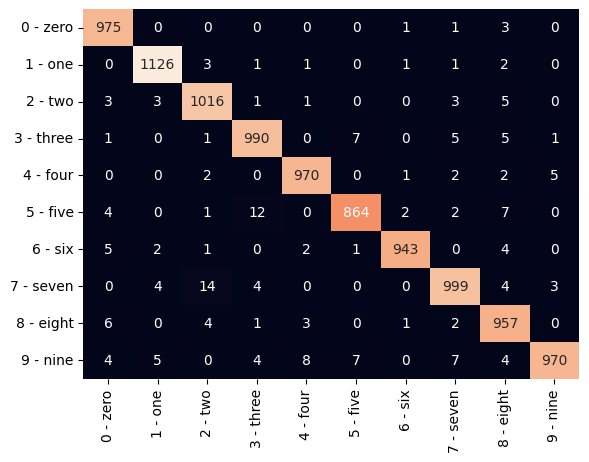

In [ ]:
import pandas as pd

# Coanvert array to pandas dataframe
df_cm = pd.DataFrame(cf_matrix, index = class_names, columns = class_names)
sns.heatmap(df_cm, annot=True, cbar=False, fmt='g')

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
KERNEL_SIZE = 3

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 1,
                       kernel_size=KERNEL_SIZE,
                       stride=1,
                       padding=0)

rand_tensor = torch.randn(3, 64, 64).unsqueeze(dim=0)

out = conv_layer(rand_tensor)
out.shape

torch.Size([1, 1, 62, 62])

In [ ]:
# Increasing the kernel_size will decrease the size of the outputted matrix

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# Obtain the datasets

train_fmnist_dataset = datasets.FashionMNIST(root=".",
                                             train=True,
                                             download=True,
                                             transform = transforms.ToTensor())
test_fmnist_dataset = datasets.FashionMNIST(root=".",
                                            train=False,
                                            download=True,
                                            transform = transforms.ToTensor())

In [ ]:
example, label = train_fmnist_dataset[0]
len(train_fmnist_dataset)

60000

In [ ]:

train_fmnist_dataloader = DataLoader(dataset=train_fmnist_dataset,
                               batch_size = 32,
                               shuffle=True,
                               num_workers = os.cpu_count())

test_fmnist_dataloader = DataLoader(dataset=test_fmnist_dataset,
                              batch_size=32,
                              shuffle=False,
                              num_workers = os.cpu_count())

In [ ]:
# Recreating the Tiny VGG Model
from torch import nn

class ClassificationModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     padding=0)
    )
    self.layer_stack2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2,
                     padding=0)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=10 * 7 * 7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.layer_stack1(x)
    x = self.layer_stack2(x)
    return self.classifier(x)



In [ ]:
fmnist_classes = train_fmnist_dataset.classes
fmnist_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
example.unsqueeze(dim = 0)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
model_3 = ClassificationModelV1(input_shape = 1, hidden_units = 10, output_shape = len(fmnist_classes)).to(device)

In [ ]:
example = example.unsqueeze(dim=0)
example.shape

torch.Size([1, 1, 28, 28])

In [ ]:
model_3(example.to(device))

tensor([[ 0.0008,  0.0216, -0.0542, -0.0409,  0.0505, -0.0629,  0.0194,  0.0458,
         -0.0087, -0.0458]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_3.parameters(),
                             lr = 0.001)

# Start training
EPOCHS = 10

train_start_time = timer()

results = train(model = model_3,
                epochs = EPOCHS,
                train_dataloader = train_fmnist_dataloader,
                test_dataloader = test_fmnist_dataloader,
                loss_fn = loss_fn,
                accuracy_fn = accuracy_fn,
                optimizer = optimizer,
                device = device)

train_end_time = timer()

print(f"\nTotal Train Time : {train_end_time - train_start_time }")

Starting Training ----------------


  0%|          | 0/10 [00:00<?, ?it/s]

Epcoh : 0 | Train Loss : 0.248 | Train Acc : 0.80 | Test Loss : 0.386 | Test Acc : 0.85
Epcoh : 1 | Train Loss : 0.542 | Train Acc : 0.86 | Test Loss : 0.349 | Test Acc : 0.86
Epcoh : 2 | Train Loss : 0.245 | Train Acc : 0.88 | Test Loss : 0.327 | Test Acc : 0.87
Epcoh : 3 | Train Loss : 0.344 | Train Acc : 0.89 | Test Loss : 0.299 | Test Acc : 0.88
Epcoh : 4 | Train Loss : 0.405 | Train Acc : 0.90 | Test Loss : 0.292 | Test Acc : 0.89
Epcoh : 5 | Train Loss : 0.108 | Train Acc : 0.90 | Test Loss : 0.276 | Test Acc : 0.89
Epcoh : 6 | Train Loss : 0.215 | Train Acc : 0.90 | Test Loss : 0.265 | Test Acc : 0.90
Epcoh : 7 | Train Loss : 0.211 | Train Acc : 0.91 | Test Loss : 0.262 | Test Acc : 0.90
Epcoh : 8 | Train Loss : 0.333 | Train Acc : 0.91 | Test Loss : 0.262 | Test Acc : 0.90
Epcoh : 9 | Train Loss : 0.304 | Train Acc : 0.91 | Test Loss : 0.287 | Test Acc : 0.89

Total Train Time : 196.5231271370003


In [ ]:
model_3.eval()

predictions = []
with torch.inference_mode():
  for (X, y) in test_fmnist_dataloader:
    X, y = X.to(device), y.to(device)
    predictions.append(model_3(X).softmax(dim=1).argmax(dim=1))

  predictions = torch.cat(predictions,dim=0).cpu()


In [ ]:
predictions[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
fmnist_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

tensor(5)
tensor(7)
tensor(6)


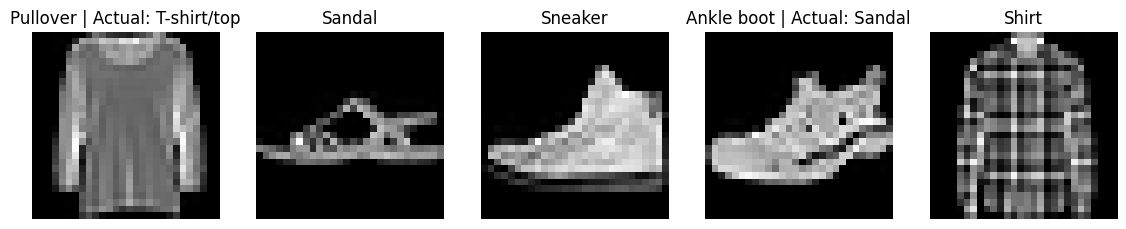

In [ ]:
import random
plt.figure(figsize=(14,6))

for i in range(5):
  plt.subplot(1, 5, i+1)

  index = random.randint(0, len(test_fmnist_dataset))
  example = test_fmnist_dataset.data[index]
  plt.imshow(example, cmap="gray")

  if predictions[index] == test_fmnist_dataset.targets[index]:
    print(predictions[index])
    plt.title(fmnist_classes[predictions[index]], c="g")
  else:
    plt.title(f"{fmnist_classes[predictions[index]]} | Actual: {fmnist_classes[test_fmnist_dataset.targets[index]]}", c="r")
  plt.axis(False)

In [ ]:
# Check the wrong labels

import numpy as np

wrong preds = np.where(np.equal(predictions, test_fmnist_dataset.targets))
for i in range(5):
  plt.subplot(1, 5, i+1)
  index = random.randint(0, len(wrong_preds))

  example = test_fmnist_dataset.data[index]
  plt.imshow(example,cmap="gray")
  plt.title(f"{fmnist_classes[predictions[index]]} | Actual: {fmnist_classes[test_fmnist_dataset.targets[index]]}")
  plt.axis(False)